# Trees and Forests



## Training a Decision Tree Classifier

### Load Data From CSV File

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [13]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis


In [14]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

### Feature set

Lets define feature sets, X:

In [15]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [16]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [17]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [19]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix


decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)

target_predicted=model.predict(X_test)
print("Accuracy", model.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.395
Class Confusion Matrix
 [[30  6 10  5]
 [ 7 19  8 10]
 [15 14 17  8]
 [18  9 11 13]]


### Discussion
Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default `DecisionTreeClassifier` uses Gini impurity:
$$
G(t) = 1 - \sum_{i=1}^c{p_i^2}
$$
where G(t) is the Gini impurity at node t and $p_i$ is the proportion of observations of class c at node t.

This process of finding the decision rules that create splits to increase impurity is repeated recursively untill all leaf nodes are pure (i.e. contain only one class) or some abritary cut-off is reached

We can change the `criterion` parameter to use a different impurity measurement

In [20]:
# create decision tree classifier using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = decisiontree_entropy.fit(X_train, y_train)

target_predicted=model_entropy.predict(X_test)
print("Accuracy", model_entropy.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.335
Class Confusion Matrix
 [[23  9 10  9]
 [13 12  7 12]
 [14 16 17  7]
 [12 12 12 15]]


In [21]:
## Write your own code for decision tree by using Information Gain 
## Don't use ready code 



def entropi(a):
    if len(a) == 0:
        return 0

    sayac = {}
    for eleman in a:
        if eleman in sayac:
            sayac[eleman] += 1
        else:
            sayac[eleman] = 1

    olasiliklar = []  
    for deger in sayac.values():
        olasilik = deger / len(a)
        olasiliklar.append(olasilik)

    sonuc = 0   
    for olasilik in olasiliklar:
        if olasilik > 0:
            sonuc -= olasilik * np.log2(olasilik)
    return sonuc

def information_gain(a, b, ozellik_indeksi, esik_deger):
    parent_entropi = entropi(b)
    
    sol_maske = a[:, ozellik_indeksi] <= esik_deger
    sag_maske = ~sol_maske
    
    sol_entropi = entropi(b[sol_maske])
    sag_entropi = entropi(b[sag_maske])
    
    n = len(b)   
    n_sol = sum(sol_maske)
    n_sag = sum(sag_maske)
    
    sol_agirlik = n_sol / n
    sol_katki = sol_agirlik * sol_entropi
    sag_agirlik = n_sag / n
    sag_katki = sag_agirlik * sag_entropi
    child_entropi = sol_katki + sag_katki

    return parent_entropi - child_entropi

def split(a, b, ozellik_indeksleri):
    en_iyi_kazanc = -1
    en_iyi_ozellik = None
    en_iyi_esik_deger = None
    
    for ozellik_indeksi in ozellik_indeksleri:
        esik_degerleri = np.unique(a[:, ozellik_indeksi])
        
        for esik_deger in esik_degerleri:
            kazanc = information_gain(a, b, ozellik_indeksi, esik_deger)
            
            if kazanc > en_iyi_kazanc:
                en_iyi_kazanc = kazanc
                en_iyi_ozellik = ozellik_indeksi
                en_iyi_esik_deger = esik_deger
    
    return en_iyi_ozellik, en_iyi_esik_deger, en_iyi_kazanc

def en_cok_tekrar_eden(liste):
    sayac = {}
    for item in liste:
        sayac[item] = sayac.get(item, 0) + 1
    if not sayac:
        return None, 0
    en_cok = max(sayac, key=sayac.get)
    return en_cok, sayac[en_cok]

def agaci_olustur(a, b, derinlik=0, max_derinlik=None, kullanilan_ozellikler=None, ozellik_adlari=None):
    if kullanilan_ozellikler is None:
        kullanilan_ozellikler = set()

    siniflar = np.unique(b)

    if len(siniflar) == 1 or a.shape[1] == 0 or (max_derinlik is not None and derinlik >= max_derinlik):
        en_cok_sinif, _ = en_cok_tekrar_eden(b.tolist())
        return {'yaprak': True, 'deger': en_cok_sinif}

    ozellik_indeksleri = [i for i in range(a.shape[1]) if i not in kullanilan_ozellikler]
    if not ozellik_indeksleri:
        en_cok_sinif, _ = en_cok_tekrar_eden(b.tolist())
        return {'yaprak': True, 'deger': en_cok_sinif}

    en_iyi_ozellik, en_iyi_esik_deger, en_iyi_kazanc = split(a, b, ozellik_indeksleri)

    if en_iyi_kazanc == 0:
        en_cok_sinif, _ = en_cok_tekrar_eden(b.tolist())
        return {'yaprak': True, 'deger': en_cok_sinif}

    sol_maske = a[:, en_iyi_ozellik] <= en_iyi_esik_deger
    sag_maske = ~sol_maske
    a_sol, b_sol = a[sol_maske], b[sol_maske]
    a_sag, b_sag = a[sag_maske], b[sag_maske]

    yeni_kullanilan_ozellikler = kullanilan_ozellikler.copy()
    yeni_kullanilan_ozellikler.add(en_iyi_ozellik)

    sol_alt_agac = agaci_olustur(a_sol, b_sol, derinlik + 1, max_derinlik, yeni_kullanilan_ozellikler, ozellik_adlari)
    sag_alt_agac = agaci_olustur(a_sag, b_sag, derinlik + 1, max_derinlik, yeni_kullanilan_ozellikler, ozellik_adlari)

    return {
        'yaprak': False,
        'ozellik': en_iyi_ozellik,
        'esik_deger': en_iyi_esik_deger,
        'sol': sol_alt_agac,
        'sag': sag_alt_agac
    }

def tahmin(agac, X):
    sonuclar = []
    for x in X:
        dugum = agac
        while not dugum['yaprak']:
            if x[dugum['ozellik']] <= dugum['esik_deger']:
                dugum = dugum['sol']
            else:
                dugum = dugum['sag']
        sonuclar.append(dugum['deger'])
    return np.array(sonuclar)


agac = agaci_olustur(X_train, y_train, max_derinlik=4, ozellik_adlari=df.columns[:-1].tolist())

y_tahmin = tahmin(agac, X_test)

dogruluk = np.mean(y_tahmin == y_test)
print(f"dogruluk:{dogruluk:.2f}")

cm = confusion_matrix(y_test, y_tahmin)
print("confusion matrixi:")
print(cm)

dogruluk:0.39
confusion matrixi:
[[29  0 14  8]
 [ 9  5 17 13]
 [22  2 27  3]
 [17  7 10 17]]




##  Visualizing a Decision Tree Model

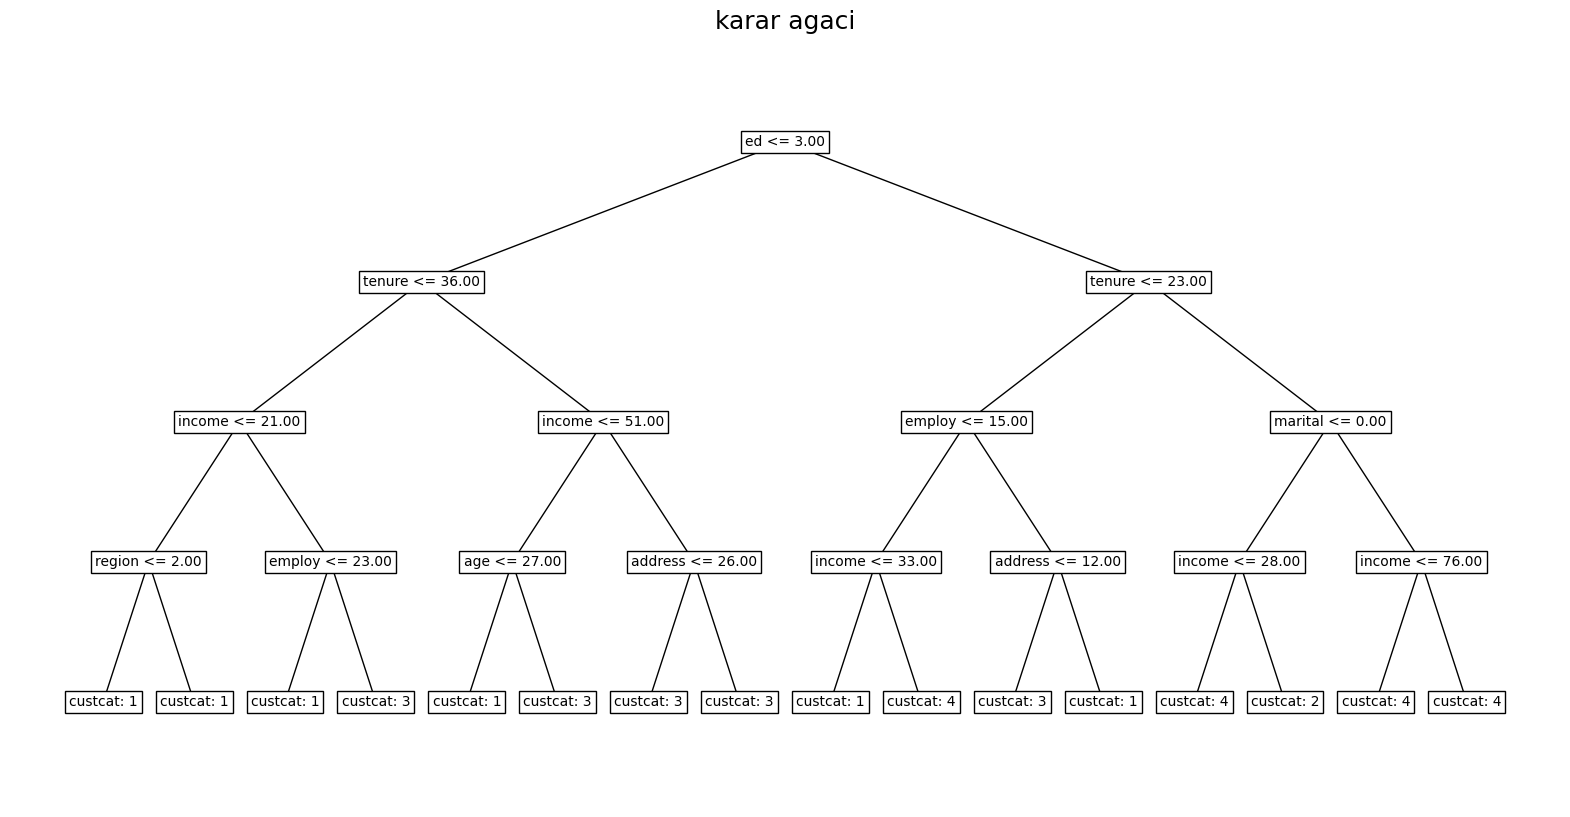

In [22]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import matplotlib.patches as patches


## Write your own code to visualize tree with 4 levels



def agaci_ciz(agac, ozellik_adlari=None, maksimum_derinlik=4):
    plt.figure(figsize=(20, 10))
    eksen = plt.gca()
    eksen.set_axis_off()

    def dugumu_ciz(dugum, x, y, genislik, yukseklik, derinlik=0):
        if derinlik > maksimum_derinlik:
            return

        if dugum['yaprak']:
            dugum_metni = f"custcat: {dugum['deger']}"
        else:
            ozellik_adi = ozellik_adlari[dugum['ozellik']] if ozellik_adlari else f"ozellik_{dugum['ozellik']}"
            dugum_metni = f"{ozellik_adi} <= {dugum['esik_deger']:.2f}"

        dikdortgen = patches.Rectangle((x - genislik / 2, y - yukseklik / 2), genislik, yukseklik, linewidth=1, edgecolor='white', facecolor='white')
        
        eksen.add_patch(dikdortgen)
        
        plt.text(x, y, dugum_metni, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', pad=3))

        if not dugum['yaprak']:
            sol_x = x - genislik / 2
            sol_y = y - yukseklik
            sag_x = x + genislik / 2
            sag_y = y - yukseklik

            plt.plot([x, sol_x], [y, sol_y], 'k-', linewidth=1)
            plt.plot([x, sag_x], [y, sag_y], 'k-', linewidth=1)

            dugumu_ciz(dugum['sol'], sol_x, sol_y, genislik / 2, yukseklik, derinlik + 1)
            dugumu_ciz(dugum['sag'], sag_x, sag_y, genislik / 2, yukseklik, derinlik + 1)

    if agac:
        agac_yuksekligi = maksimum_derinlik
        dugum_genisligi = 200
        dugum_yuksekligi = 50
        baslangic_x = plt.xlim()[1] / 2
        baslangic_y = plt.ylim()[1] - 50

        dugumu_ciz(agac, baslangic_x, baslangic_y, dugum_genisligi, dugum_yuksekligi)

    plt.title("karar agaci", fontsize=18)
    plt.show()
    
agaci_ciz(agac, ozellik_adlari=df.columns[:-1].tolist())

# Karsilastirma

teleCust1000t verisi uzerinde 3 farkli karar agaci modeli uyguladik. 

Ilk olarak sklearn kutuphanesinin default parametreleri ile egitilen decisiontreeclassifier modelinde dogruluk 0.395 cikti. Bu model gini indeksini kullaniyor. Burada sinif 1 en iyi performansi gosterdi (30 dogru), digerlerinin karisikliklari yuksek.

Accuracy 0.395
Class Confusion Matrix
 [[30  6 10  5]
 [ 7 19  8 10]
 [15 14 17  8]
 [18  9 11 13]]


Ikinci olarak, criterion parametresini entropi yaptik ve information gaini kullanan bir decisiontreeclassifier modelini train ettik, dogrulugu 0.335 cikti. Ilkinden daha dusuk. Sinif 4 perfomansi bir tik artti, digerleri dustu. Bu sonuca gore entropi bu veri setinde gini'den daha az etkili gibi gorunuyor. Hiperparamatreler optimize edilmemis olabilir.

Accuracy 0.335
Class Confusion Matrix
 [[23  9 10  9]
 [13 12  7 12]
 [14 16 17  7]
 [12 12 12 15]]


Ucuncu olarak kendim information gain'e dayali bir agac olusturdum. Bu modelin dogrulugu 0.39 cikti. Bu sonuc sklearn'in default (gini) ayarlariyla egitilen modele cok yakin. Sinif 1 ve 3 iyi performans gosterdi, sinif 2 ise cok kotu. 

dogruluk:0.39
confusion matrixi:
[[29  0 14  8]
 [ 9  5 17 13]
 [22  2 27  3]
 [17  7 10 17]]
